In [144]:
# import python libraries

# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn utilities
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# prediction
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [145]:
# Loading the dataset:
test_data = pd.read_csv("train.csv")
train_data= pd.read_csv("test.csv")

In [146]:
# Get the numbers of rows and columns:
train_test_data = [train_data, test_data]
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (292, 80)
Test data shape:  (1168, 81)


In [147]:
# Showing 5 raws of test dataframe:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.00,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.00,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.00,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [148]:
# Basic information about test dataset:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [149]:
# Showing 5 raws of train dataframe:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.00,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.00,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.00,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [150]:
# Basic information about train dataset:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [151]:
# Summary statistics of test dataset:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.828750,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [152]:
# Summary statistics of train dataset:
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
count,292,292,14,292,292,292,292,292,292,292,292,292,292,292,292,292,292,291,292,292,292,285,285,285,285,285,292,292,292,291,292,292,153,275,275,275,275,292,44,10,292,292
unique,4,2,2,4,4,2,5,3,24,8,2,5,8,5,3,12,14,4,4,4,6,4,3,4,6,6,4,4,2,4,4,6,5,6,3,5,5,3,4,2,6,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Normal
freq,223,290,9,185,265,291,210,277,43,255,291,239,148,226,290,119,117,168,189,260,134,132,270,197,88,254,285,156,275,264,157,275,79,179,118,261,265,269,28,9,268,253


In [153]:
# Drop id column from train-test dataset
id_test = train_data['Id'].tolist()

for data in train_test_data:
    data.drop(['Id'], axis=1, inplace=True)
print(train_data.shape, test_data.shape)

(292, 79) (1168, 80)


In [154]:
# Seperate test and train dataset numeric columns.
test_data_num = test_data.select_dtypes(exclude=['object'])
train_data_num = train_data.select_dtypes(exclude=['object'])
test_data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.00,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00,15865,8,6,1970,1970,0.00,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00,9920,7,5,1996,1997,0.00,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00,11751,6,6,1977,1977,480.00,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.00,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


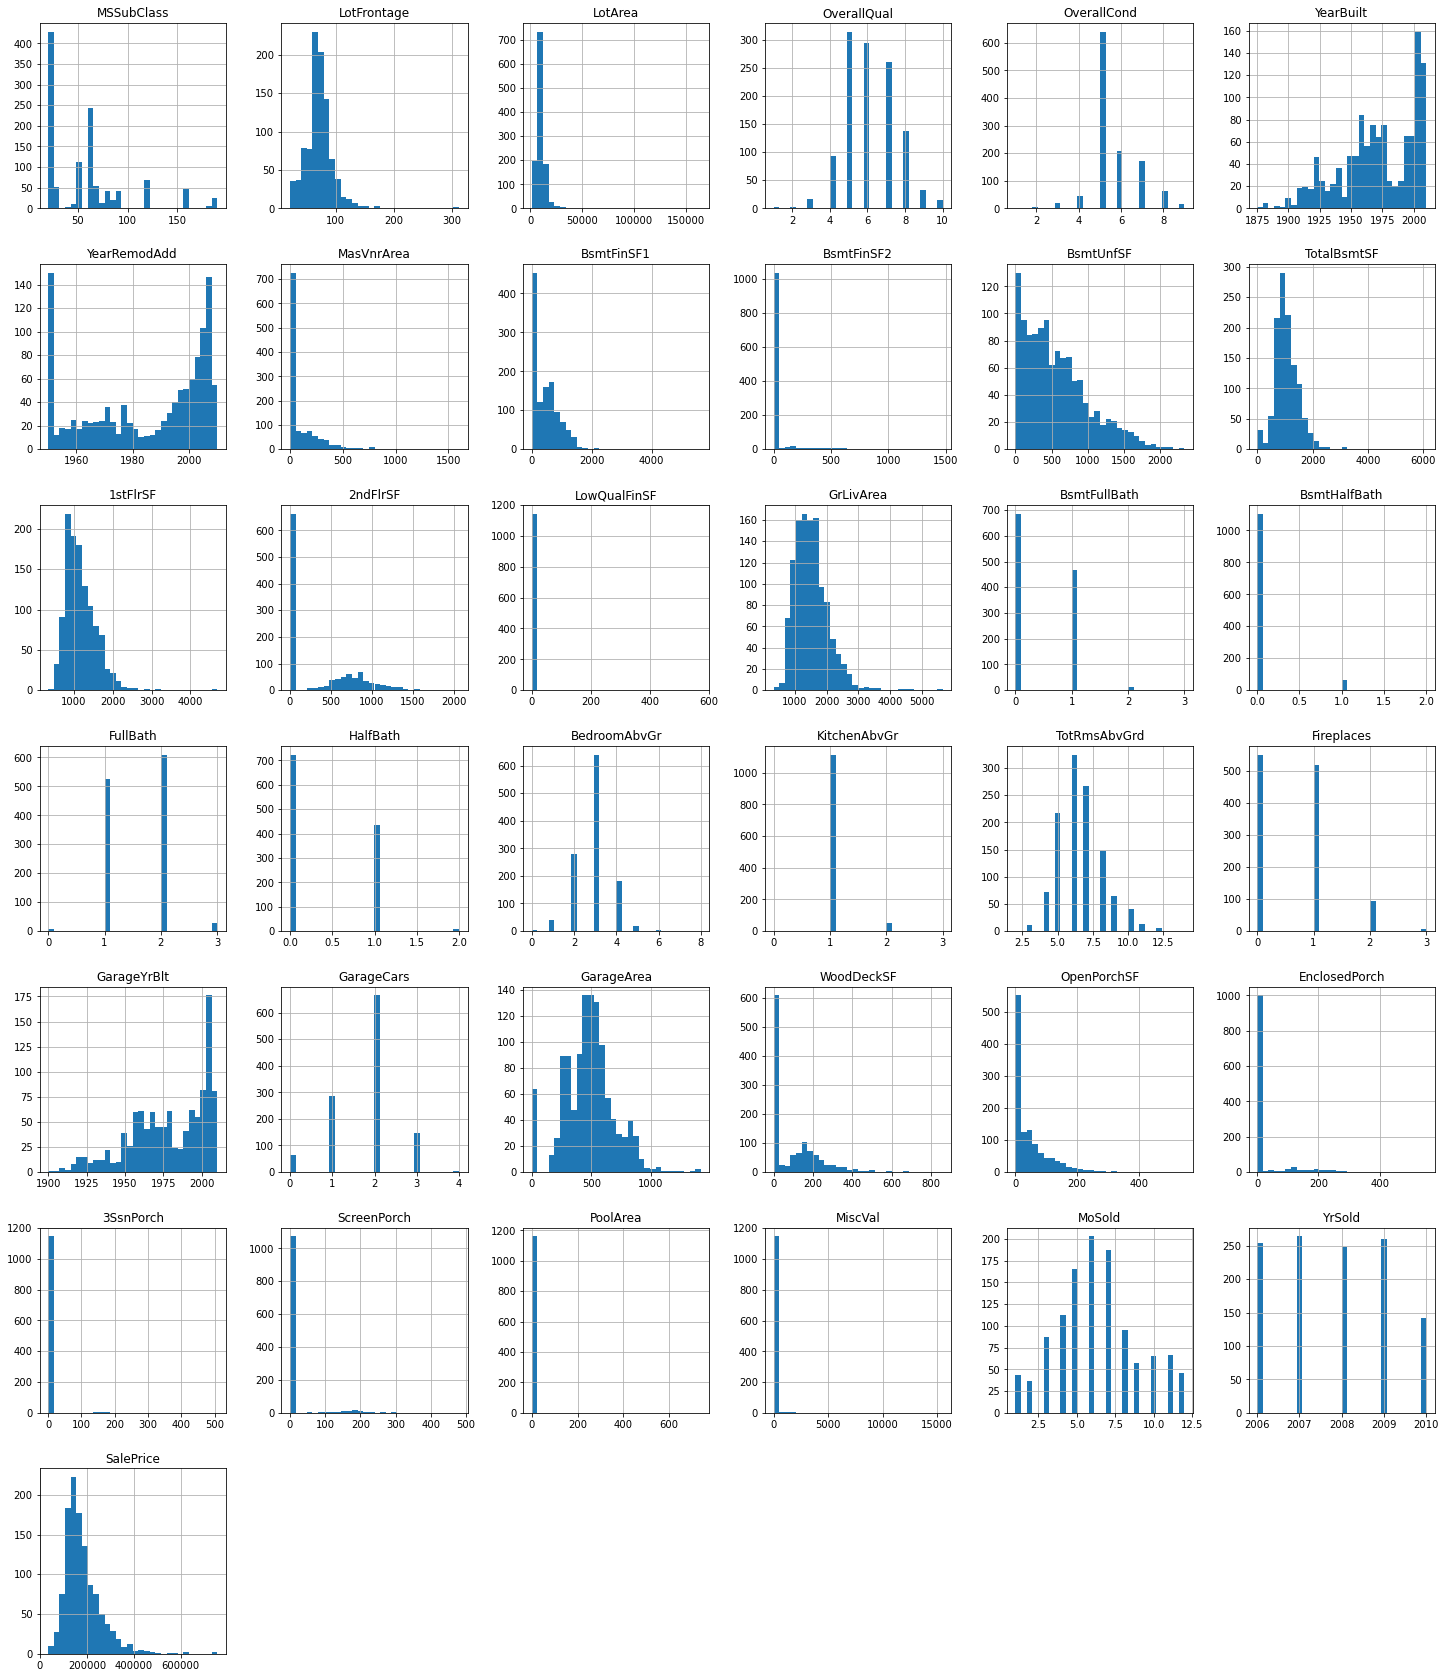

In [155]:
# Display histogram of numeric column of test dataset.
test_data_num.hist(figsize=(25, 30), bins=30);

In [ ]:
# Find low variance features and drop it.
selector = VarianceThreshold(threshold=0.05)

selector.fit(test_data_num.iloc[:, :-1])

sup = selector.get_support()

print('Number of retained features: ', sum(sup))

print('Number low-variance features: ', sum(~sup))

low_var_fet = test_data_num.drop(['SalePrice'], axis=1).loc[:, ~sup].columns.values

print('Low-variance features: ', low_var_fet)

print('Before: ',train_data_num.shape, test_data_num.shape)
train_data_num.drop(low_var_fet, axis=1, inplace=True)
test_data_num.drop(low_var_fet, axis=1, inplace=True)
print('After: ', train_data_num.shape, test_data_num.shape)

### Correlation:

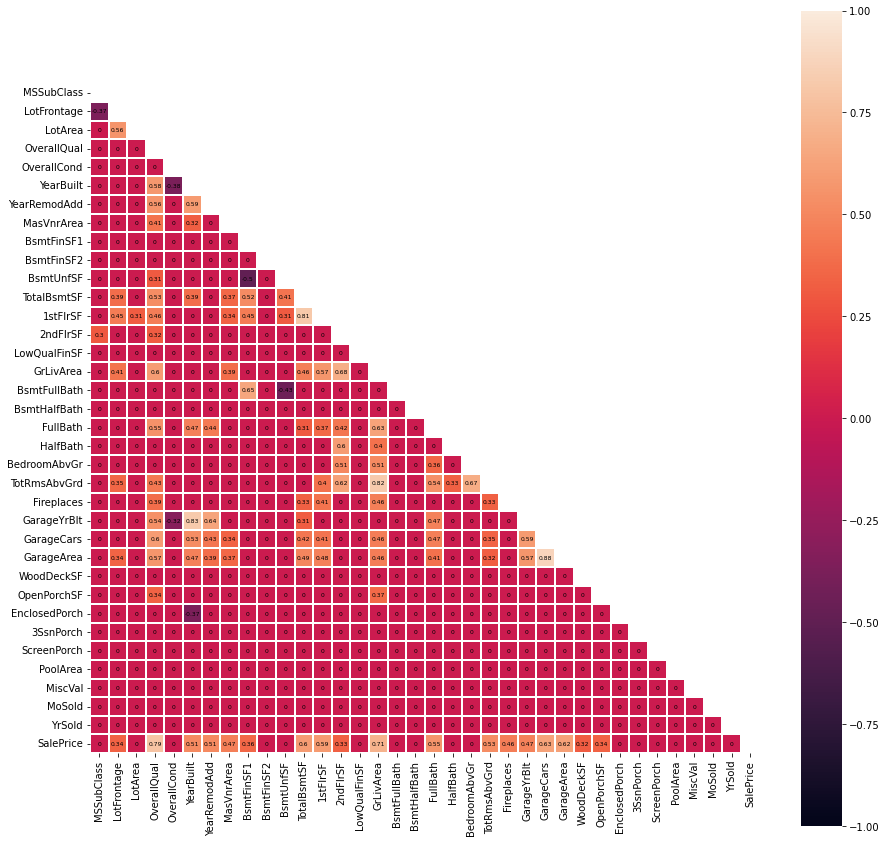

In [157]:
pd.options.display.float_format = "{:,.2f}".format

corr_mat = test_data_num.corr('pearson')

# replace very weak correlation
corr_mat[(corr_mat < 0.3) & (corr_mat > -0.3)] = 0

# define triangular mask for better visibility
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, mask=mask, vmax=1.0, vmin=-1.0, square=True, annot=True, annot_kws={"size": 6, "color": "black"}, linewidths=0.1, cmap='rocket');

In [158]:
corr_features = corr_mat['SalePrice'].drop(['SalePrice'])
corr_features.sort_values(ascending=False)

OverallQual     0.79
GrLivArea       0.71
GarageCars      0.63
GarageArea      0.62
TotalBsmtSF     0.60
1stFlrSF        0.59
FullBath        0.55
TotRmsAbvGrd    0.53
YearBuilt       0.51
YearRemodAdd    0.51
GarageYrBlt     0.47
MasVnrArea      0.47
Fireplaces      0.46
BsmtFinSF1      0.36
LotFrontage     0.34
OpenPorchSF     0.34
2ndFlrSF        0.33
WoodDeckSF      0.32
MoSold          0.00
EnclosedPorch   0.00
3SsnPorch       0.00
MiscVal         0.00
ScreenPorch     0.00
PoolArea        0.00
MSSubClass      0.00
BsmtHalfBath    0.00
BedroomAbvGr    0.00
HalfBath        0.00
BsmtFullBath    0.00
LowQualFinSF    0.00
BsmtUnfSF       0.00
BsmtFinSF2      0.00
OverallCond     0.00
LotArea         0.00
YrSold          0.00
Name: SalePrice, dtype: float64

In [159]:
# There are various strength of correlation:

# < 0.3 - very weak correlation (on table it is replaced by 0)
# > 0.3 & < 0.5 - weak correaltion
# > 0.5 & < 0.7 - moderate correlation
# > 0.7 - strong correlation
# It also works for negative coefficients.

Strongly correlated features:  ['OverallQual', 'GrLivArea']


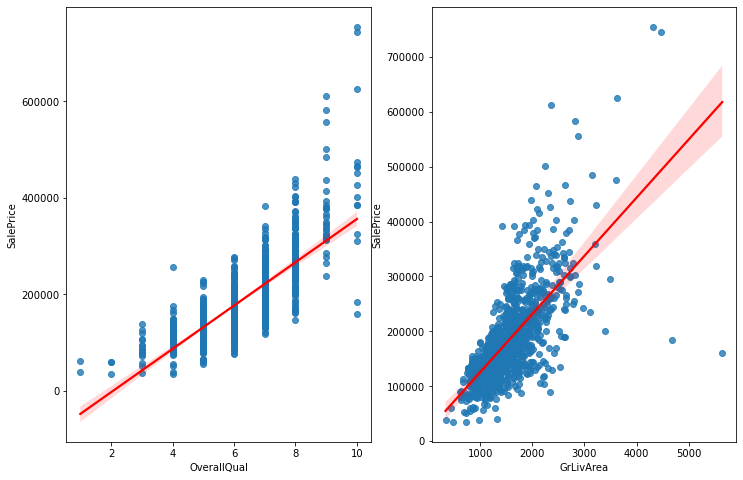

In [160]:
# strong correlation features (> 0.7)

strong_corr_fet_names = corr_features[abs(corr_features) >= 0.7].sort_values(ascending=False).index.tolist()
print('Strongly correlated features: ', strong_corr_fet_names)

strong_fet = test_data_num.loc[:, strong_corr_fet_names + ['SalePrice']]

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, ax in enumerate(ax):
    if i < len(strong_corr_fet_names):
        sns.regplot(x=strong_corr_fet_names[i], y='SalePrice', data=strong_fet, ax=ax, line_kws={'color': 'red'})

Moderate correlation features:  ['GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


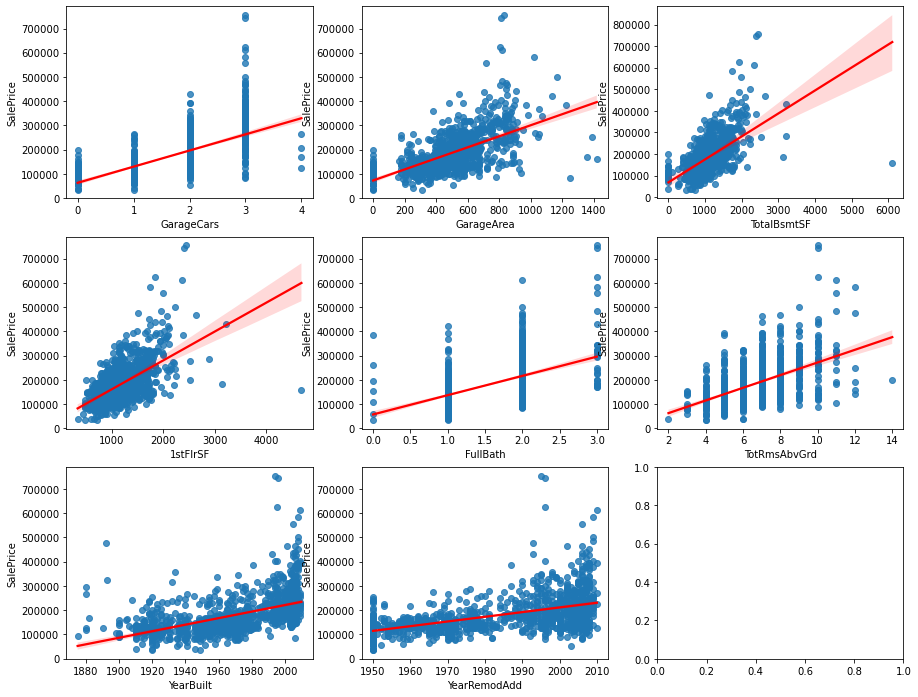

In [161]:
# moderate correlation features ( > 0.5 & < 0.7)

moderate_fet_names = corr_features[(abs(corr_features) >= 0.5) & (abs(corr_features) < 0.7)].sort_values(ascending=False).index.tolist()
print('Moderate correlation features: ', moderate_fet_names)

moderate_fet = test_data_num.loc[:, moderate_fet_names + ["SalePrice"]]

fig, ax = plt.subplots(3, 3, figsize=(15, 12))

for i, ax in enumerate(fig.axes):
    if i < len(moderate_fet_names):
        sns.regplot(x=moderate_fet_names[i], y='SalePrice', data=moderate_fet, ax=ax, line_kws={'color': 'red'})

Weakly correlated features:  ['GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF']


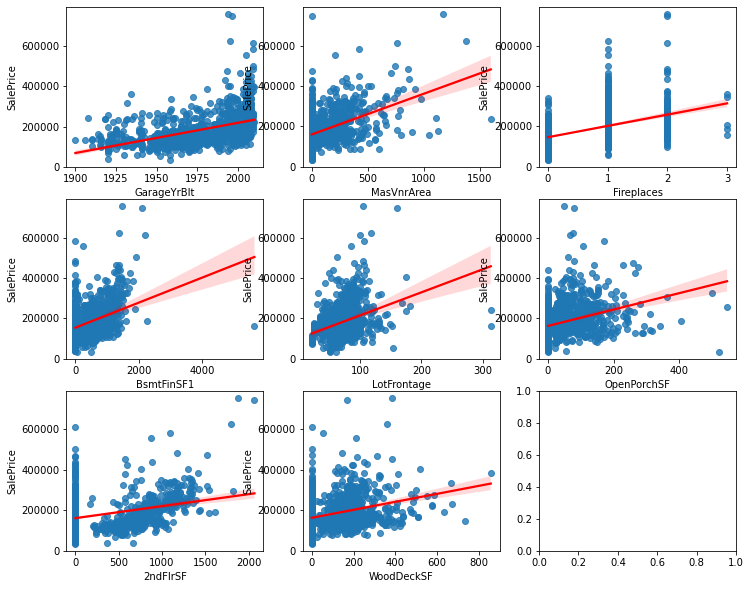

In [162]:
# weakly correlated features ( > 0.3 & < 0.5)

weak_fet_names = corr_features[(abs(corr_features) >= 0.3) & (abs(corr_features) < 0.5)].sort_values(ascending=False).index.tolist()
print('Weakly correlated features: ', weak_fet_names)

weak_fet = test_data_num.loc[:, weak_fet_names + ["SalePrice"]]

fig, ax = plt.subplots(3, 3, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(weak_fet_names):
        sns.regplot(x=weak_fet_names[i], y='SalePrice', data=weak_fet, ax=ax, line_kws={'color': 'red'})

In [163]:
numerical_features = strong_corr_fet_names + moderate_fet_names + weak_fet_names + ['SalePrice']

test_data_num = test_data_num.loc[:, numerical_features]
# excepting SalePrice
train_data_num = train_data_num.loc[:, numerical_features[:-1]]
test_data_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,OpenPorchSF,2ndFlrSF,WoodDeckSF,SalePrice
0,6,958,2,440,1078,958,2,5,1976,1976,"1,977.00",0.00,1,120,NaN,205,0,0,128000
1,8,2217,2,621,2217,2217,2,8,1970,1970,"1,970.00",0.00,1,351,95.00,207,0,81,268000
2,7,2013,2,455,1117,1127,2,8,1996,1997,"1,997.00",0.00,1,862,92.00,130,886,180,269790
3,6,1844,2,546,1844,1844,2,7,1977,1977,"1,977.00",480.00,1,705,105.00,122,0,0,190000
4,6,1602,2,529,1602,1602,2,8,1977,2000,"1,977.00",126.00,1,1246,NaN,0,0,240,215000


In [164]:
from itertools import combinations

# find pairs of strongly correalted features
cols = test_data_num.columns.tolist()[:-1]
pairs = []

for pair in combinations(range(len(cols)), 2):
    if corr_mat.loc[cols[pair[0]], cols[pair[1]]] >= 0.7:
        pairs.append((cols[pair[0]], cols[pair[1]]))
        
pairs

[('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('YearBuilt', 'GarageYrBlt')]

In [165]:
# Now we can drop one feature from each pair

for _, col in pairs:
    test_data_num.drop(col, axis=1, inplace=True)
    train_data_num.drop(col, axis=1, inplace=True)

test_data_num.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,OpenPorchSF,2ndFlrSF,WoodDeckSF,SalePrice
0,6,958,2,1078,2,1976,1976,0.00,1,120,NaN,205,0,0,128000
1,8,2217,2,2217,2,1970,1970,0.00,1,351,95.00,207,0,81,268000
2,7,2013,2,1117,2,1996,1997,0.00,1,862,92.00,130,886,180,269790
3,6,1844,2,1844,2,1977,1977,480.00,1,705,105.00,122,0,0,190000
4,6,1602,2,1602,2,1977,2000,126.00,1,1246,NaN,0,0,240,215000


In [166]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1168 non-null   int64  
 1   GrLivArea     1168 non-null   int64  
 2   GarageCars    1168 non-null   int64  
 3   TotalBsmtSF   1168 non-null   int64  
 4   FullBath      1168 non-null   int64  
 5   YearBuilt     1168 non-null   int64  
 6   YearRemodAdd  1168 non-null   int64  
 7   MasVnrArea    1161 non-null   float64
 8   Fireplaces    1168 non-null   int64  
 9   BsmtFinSF1    1168 non-null   int64  
 10  LotFrontage   954 non-null    float64
 11  OpenPorchSF   1168 non-null   int64  
 12  2ndFlrSF      1168 non-null   int64  
 13  WoodDeckSF    1168 non-null   int64  
 14  SalePrice     1168 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 137.0 KB


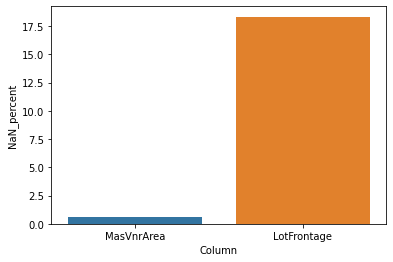

In [167]:
test_nan_cols = test_data_num.columns[test_data_num.isnull().any()].tolist()
test_nan = pd.DataFrame({ 'Column': test_nan_cols,
                         'NaN_percent': [ test_data_num[col].isnull().sum() * 100 / len(test_data_num) 
                                         for col in test_nan_cols] })
sns.barplot(data=test_nan, x='Column', y='NaN_percent');

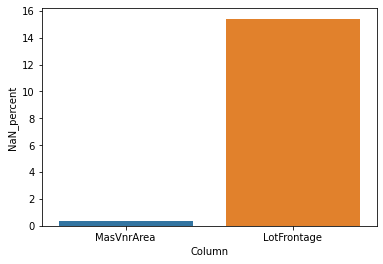

In [168]:
train_nan_cols = train_data_num.columns[train_data_num.isnull().any()].tolist()
train_nan = pd.DataFrame({ 'Column': train_nan_cols,
                         'NaN_percent': [ train_data_num[col].isnull().sum() * 100 / len(train_data_num) 
                                         for col in train_nan_cols] })
sns.barplot(data=train_nan, x='Column', y='NaN_percent');

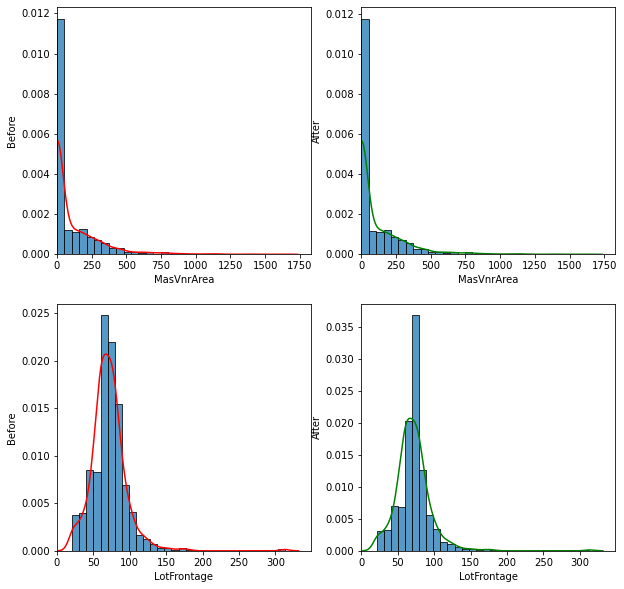

In [169]:
imp = SimpleImputer(strategy='median')
imp_test_data = pd.DataFrame(imp.fit_transform(test_data_num))
imp_test_data.columns = test_data_num.columns

fig, ax = plt.subplots(2,2, figsize=(10, 10))

for i, col in enumerate(test_nan_cols):
    
    # before filling NaN
    bfr = sns.histplot(data=test_data_num, x=col, ax=ax[i, 0], stat='density', bins=30)
    sns.kdeplot(data=test_data_num, x=col, ax=ax[i, 0], color='red')
    bfr.set_xlim(left=0)
    bfr.set_ylabel('Before', fontsize=10)
    
    # after filling NaN
    aftr = sns.histplot(data=imp_test_data, x=col, ax=ax[i, 1], stat='density', bins=30)
    sns.kdeplot(data=test_data_num, x=col, ax=ax[i, 1], color='green')
    aftr.set_xlim(left=0)
    aftr.set_ylabel('After', fontsize=10)

In [170]:
# drop LotFrontage
imp_test_data.drop(['LotFrontage'], axis=1, inplace=True)
train_data_num.drop(['LotFrontage'], axis=1, inplace=True)

# fill NaN in test data
imp = SimpleImputer(strategy='median')
imp_train_data = pd.DataFrame(imp.fit_transform(train_data_num))
imp_train_data.columns = train_data_num.columns

train_data_num = imp_train_data
test_data_num = imp_test_data

In [171]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1168 non-null   float64
 1   GrLivArea     1168 non-null   float64
 2   GarageCars    1168 non-null   float64
 3   TotalBsmtSF   1168 non-null   float64
 4   FullBath      1168 non-null   float64
 5   YearBuilt     1168 non-null   float64
 6   YearRemodAdd  1168 non-null   float64
 7   MasVnrArea    1168 non-null   float64
 8   Fireplaces    1168 non-null   float64
 9   BsmtFinSF1    1168 non-null   float64
 10  OpenPorchSF   1168 non-null   float64
 11  2ndFlrSF      1168 non-null   float64
 12  WoodDeckSF    1168 non-null   float64
 13  SalePrice     1168 non-null   float64
dtypes: float64(14)
memory usage: 127.9 KB


In [172]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   292 non-null    float64
 1   GrLivArea     292 non-null    float64
 2   GarageCars    292 non-null    float64
 3   TotalBsmtSF   292 non-null    float64
 4   FullBath      292 non-null    float64
 5   YearBuilt     292 non-null    float64
 6   YearRemodAdd  292 non-null    float64
 7   MasVnrArea    292 non-null    float64
 8   Fireplaces    292 non-null    float64
 9   BsmtFinSF1    292 non-null    float64
 10  OpenPorchSF   292 non-null    float64
 11  2ndFlrSF      292 non-null    float64
 12  WoodDeckSF    292 non-null    float64
dtypes: float64(13)
memory usage: 29.8 KB


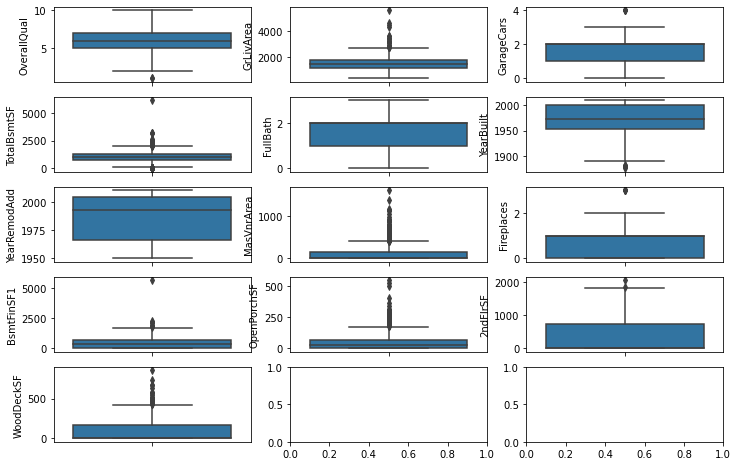

In [173]:
# outliers
fig, ax = plt.subplots(5, 3, figsize=(12, 8))
test_num_cols = test_data_num.columns.tolist()[:-1]

for i, ax in enumerate(fig.axes):
    if i < len(test_num_cols):
        sns.boxplot(data=test_data_num, y=test_num_cols[i], ax=ax)

In [174]:
from scipy import stats

for col in test_num_cols:
    z_upper_test= stats.zscore(test_data_num[col]) > 3
    z_lower_test = stats.zscore(test_data_num[col]) < -3
    q1, q3 = test_data_num[col].quantile([0.25, 0.75])
    
    test_data_num[z_upper_test] = q3
    test_data_num[z_lower_test] = q1
    
    z_upper_train = stats.zscore(train_data_num[col]) > 3
    z_lower_train = stats.zscore(train_data_num[col]) < -3
    q1, q3 = train_data_num[col].quantile([0.25, 0.75])
    
    train_data_num[z_upper_train] = q3
    train_data_num[z_lower_train] = q1

In [175]:
test_data_num.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,OpenPorchSF,2ndFlrSF,WoodDeckSF,SalePrice
0,6.00,958.00,2.00,"1,078.00",2.00,"1,976.00","1,976.00",0.00,1.00,120.00,205.00,0.00,0.00,"128,000.00"
1,8.00,"2,217.00",2.00,"2,217.00",2.00,"1,970.00","1,970.00",0.00,1.00,351.00,207.00,0.00,81.00,"268,000.00"
2,7.00,"2,013.00",2.00,"1,117.00",2.00,"1,996.00","1,997.00",0.00,1.00,862.00,130.00,886.00,180.00,"269,790.00"
3,6.00,"1,844.00",2.00,"1,844.00",2.00,"1,977.00","1,977.00",480.00,1.00,705.00,122.00,0.00,0.00,"190,000.00"
4,6.00,"1,602.00",2.00,"1,602.00",2.00,"1,977.00","2,000.00",126.00,1.00,"1,246.00",0.00,0.00,240.00,"215,000.00"


In [176]:
# Categorical data:
categorical_features = [col for col in test_data.columns if test_data.dtypes[col] == 'object']

# training data
test_data_cat = test_data[categorical_features + ['SalePrice']]

# test data
train_data_cat = train_data[categorical_features]

train_data_cat.shape, test_data_cat.shape

((292, 43), (1168, 44))

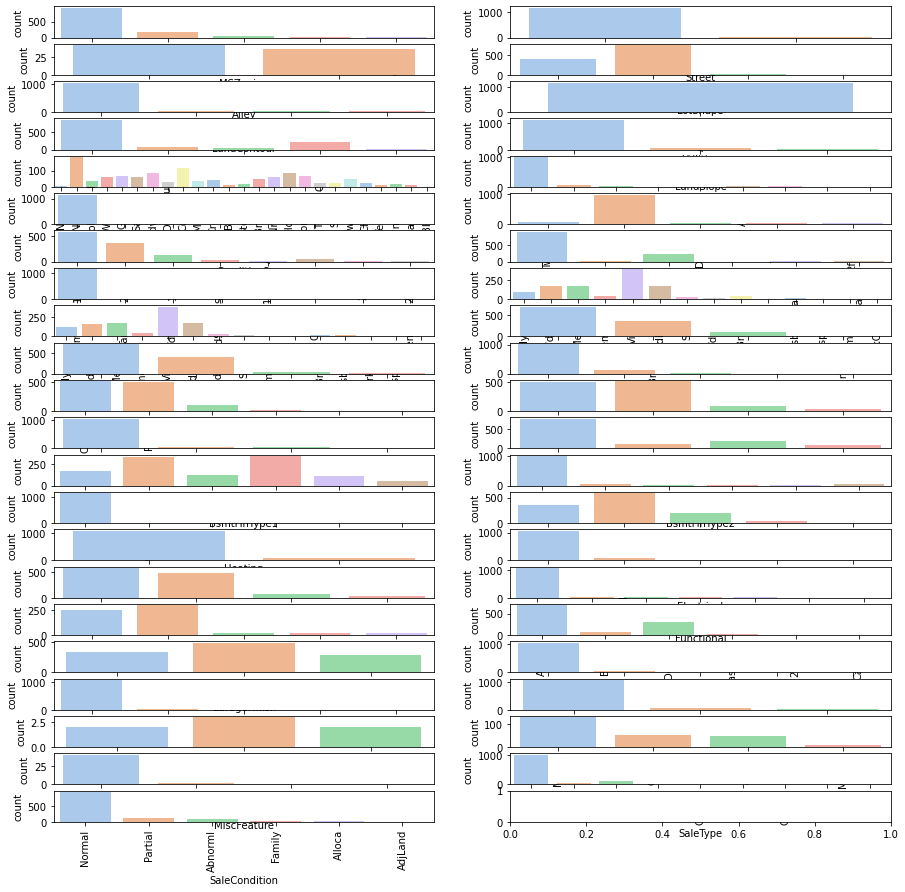

In [177]:
fig, ax = plt.subplots(round(len(test_data_cat.columns) / 2), 2, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    if i < len(test_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(data=test_data_cat, x=test_data_cat.columns[i], ax=ax, palette='pastel')
fig.tight_layout()

In [178]:
features_to_drop = ['Street', 
                    'LandContour', 
                    'Utilities', 
                    'LandSlope', 
                    'Condition2', 
                    'RoofMatl', 
                    'BsmtCond', 
                    'BsmtFinType2', 
                    'Heating', 
                    'CentralAir', 
                    'Electrical',
                    'Functional',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive'
                   ]

train_data_cat.drop(features_to_drop, axis=1, inplace=True)
test_data_cat.drop(features_to_drop, axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

((292, 28), (1168, 29))

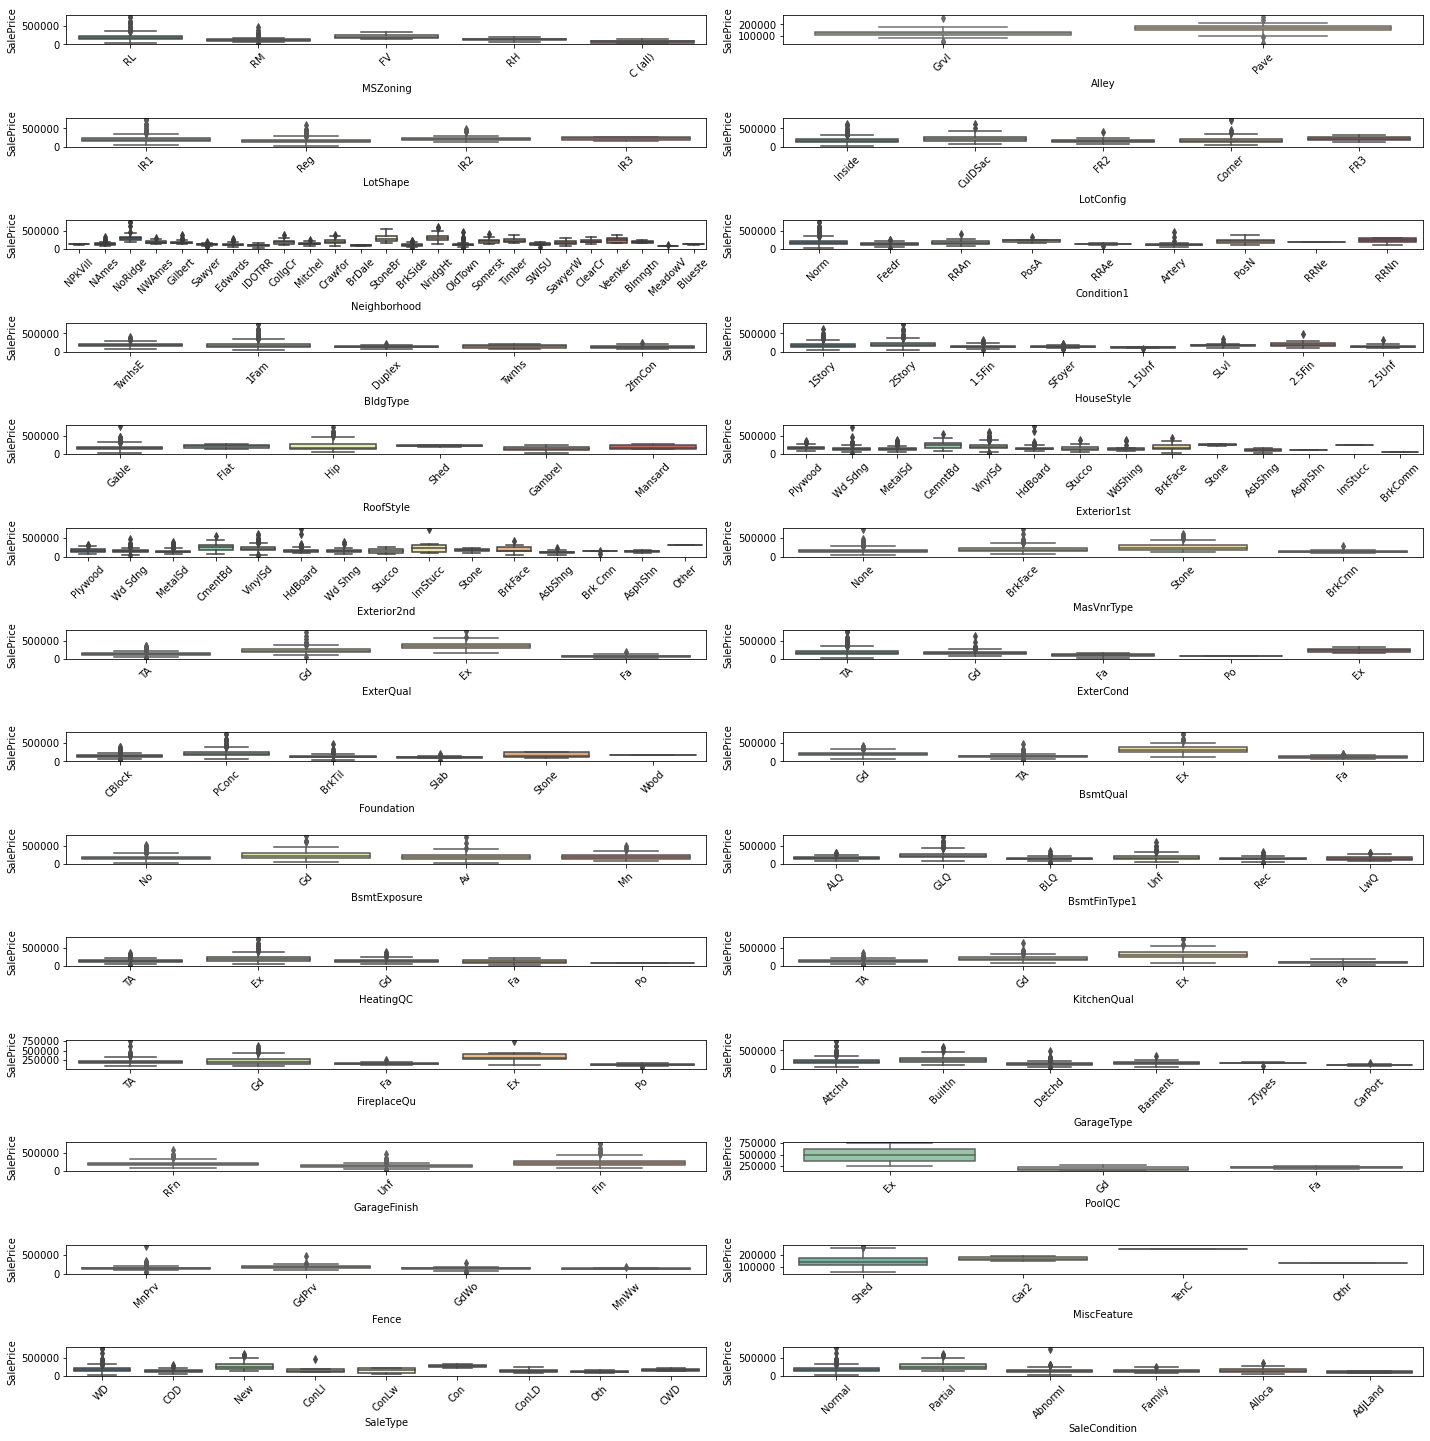

In [179]:
fig, ax = plt.subplots(round(len(test_data_cat.columns) / 2), 2, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(test_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data=test_data_cat, x=test_data_cat.columns[i], y='SalePrice', ax=ax, palette='Spectral_r')

fig.tight_layout()

In [180]:
train_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)
test_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

((292, 25), (1168, 26))

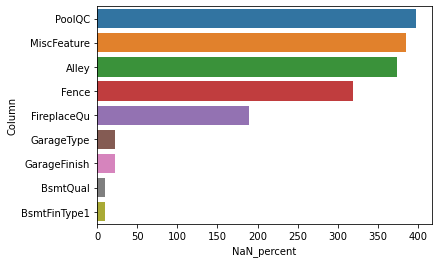

In [181]:
# filling empty values:
cols_null_test = test_data_cat.columns[test_data_cat.isnull().any()]

nan_counts_train = pd.DataFrame({
    'Column': cols_null_test,
    'NaN_percent': [test_data_cat[col].isnull().sum()*100 / len(train_data_cat) 
                    for col in cols_null_test]
})

nan_counts_train.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_train, y='Column', x='NaN_percent');


In [182]:
train_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [183]:
for col in ['GarageType', 'GarageFinish', 'BsmtQual', 'BsmtFinType1']:
    train_data_cat[col].fillna(train_data_cat[col].mode()[0], inplace=True)
    test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)

In [184]:
train_data_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [185]:
test_data_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [186]:
cols_null_train = train_data_cat.columns[train_data_cat.isnull().any()]

for col in cols_null_train:
    train_data_cat[col].fillna(train_data_cat[col].mode()[0], inplace=True)

train_data_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [187]:
train_data_cat.shape, test_data_cat.shape

((292, 20), (1168, 21))

In [188]:
# transform categories:
test_data_cat.drop(['SalePrice'], axis=1, inplace=True)

test_cat_dummies = pd.get_dummies(test_data_cat)
test_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [189]:
train_cat_dummies = pd.get_dummies(train_data_cat)
train_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,...,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [190]:
dif = [col for col in test_cat_dummies.columns if col not in test_cat_dummies.columns]
print('Found differences in: ', dif)

Found differences in:  []


In [191]:
dif = [col for col in train_cat_dummies.columns if col not in test_cat_dummies.columns]
print('Found differences in: ', dif)

Found differences in:  ['Exterior1st_CBlock']


In [192]:
train_cat_dummies.drop(dif, axis=1, inplace=True)

train_cat_dummies.shape, test_cat_dummies.shape

((292, 125), (1168, 139))

In [193]:
train_data_new = pd.concat([train_data_num, train_cat_dummies], axis=1)
test_data_new = pd.concat([test_data_num, test_cat_dummies], axis=1)

train_data_new.shape, test_data_new.shape

((292, 138), (1168, 153))

In [194]:
# Feature engeenering:
# Age of house from the year of construction
train_data_new['Age'] = train_data_new['YearBuilt'].max() - train_data_new['YearBuilt']
test_data_new['Age'] = test_data_new['YearBuilt'].max() - test_data_new['YearBuilt']

In [195]:
# Age since renovating
train_data_new['Renovate'] = train_data_new['YearRemodAdd'] - train_data_new['YearBuilt']
test_data_new['Renovate'] = test_data_new['YearRemodAdd'] - test_data_new['YearBuilt']

train_data_new['Renovate'] = np.where(train_data_new['Renovate'] < 0, 0, train_data_new['Renovate'])
test_data_new['Renovate'] = np.where(test_data_new['Renovate'] < 0, 0, test_data_new['Renovate'])

# Drop YearBuilt
train_data_new.drop(['YearBuilt'], axis=1, inplace=True)
test_data_new.drop(['YearBuilt'], axis=1, inplace=True)
# Drop YearRemodAdd
train_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)
test_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)

In [196]:
# Artificial feature combines OverallQual and GrLivArea
train_data_new['Qual_Area'] = train_data_new['OverallQual'] * train_data_new['GrLivArea']
test_data_new['Qual_Area'] = test_data_new['OverallQual'] * test_data_new['GrLivArea']

In [197]:
cont_features = test_data_new.select_dtypes(include=['int', 'float']).drop(['SalePrice'], axis=1).columns.tolist()

cont_data = test_data_new.loc[:, cont_features]
cont_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,MasVnrArea,Fireplaces,BsmtFinSF1,OpenPorchSF,2ndFlrSF,WoodDeckSF,Age,Renovate,Qual_Area
0,6.00,958.00,2.00,"1,078.00",2.00,0.00,1.00,120.00,205.00,0.00,0.00,34.00,0.00,"5,748.00"
1,8.00,"2,217.00",2.00,"2,217.00",2.00,0.00,1.00,351.00,207.00,0.00,81.00,40.00,0.00,"17,736.00"
2,7.00,"2,013.00",2.00,"1,117.00",2.00,0.00,1.00,862.00,130.00,886.00,180.00,14.00,1.00,"14,091.00"
3,6.00,"1,844.00",2.00,"1,844.00",2.00,480.00,1.00,705.00,122.00,0.00,0.00,33.00,0.00,"11,064.00"
4,6.00,"1,602.00",2.00,"1,602.00",2.00,126.00,1.00,"1,246.00",0.00,0.00,240.00,33.00,23.00,"9,612.00"


In [198]:
 # features with skew > 0.5:
skew_data = pd.DataFrame({
    'Column': cont_features,
    'Skew': abs(cont_data.skew())
}).sort_values('Skew', ascending=False)

skew_data

,Column,Skew
OverallQual,OverallQual,6.98
FullBath,FullBath,6.97
GarageCars,GarageCars,6.96
Fireplaces,Fireplaces,6.95
Age,Age,4.21
MasVnrArea,MasVnrArea,2.15
Renovate,Renovate,1.99
OpenPorchSF,OpenPorchSF,1.43
Qual_Area,Qual_Area,1.14
WoodDeckSF,WoodDeckSF,1.02


In [199]:
skew_features = skew_data[skew_data['Skew'] > 0.5]['Column'].tolist()
skew_features

['OverallQual',
 'FullBath',
 'GarageCars',
 'Fireplaces',
 'Age',
 'MasVnrArea',
 'Renovate',
 'OpenPorchSF',
 'Qual_Area',
 'WoodDeckSF',
 '2ndFlrSF',
 'BsmtFinSF1']

In [200]:
# Adding 1 to avoid logarithm of 0
for col in skew_features:
    train_data_new[col] = np.log(train_data_new[col] + 1)
    test_data_new[col] = np.log(test_data_new[col] + 1)

In [201]:
test_data_new['SalePriceLog'] = np.log(test_data_new['SalePrice'])

test_data_new.drop('SalePrice', axis=1, inplace=True)

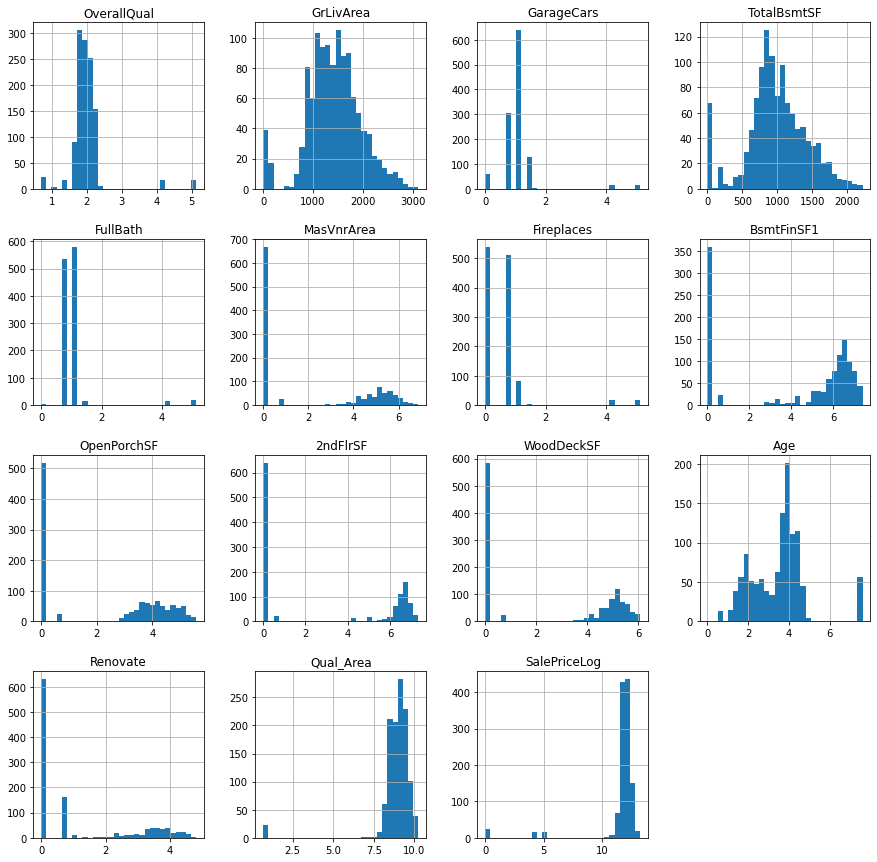

In [202]:
test_data_new_num = test_data_new.select_dtypes(include=['int', 'float'])
test_data_new_num.hist(figsize=(15, 15), bins=30);

In [203]:
# Modeling
#Preparing data
X = test_data_new.drop(['SalePriceLog'], axis=1)
y = test_data_new['SalePriceLog']

print('X shape: ', X.shape)
print('y shape: ', y.shape)


X shape:  (1168, 153)
y shape:  (1168,)


In [204]:
# Standardize data
scaler = StandardScaler().fit(X)

In [205]:
import statsmodels.api as sm

def backward_elimination(X, y, threshold=0.05):
    features = X.columns.tolist()
    
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[features]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold:
            changed = True
            worst_fet = pvalues.idxmax()
            features.remove(worst_fet)
        if not changed:
            break
            
    return features

In [206]:
selected_features = backward_elimination(X, y)
selected_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'FullBath',
 'Fireplaces',
 'BsmtFinSF1',
 'WoodDeckSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition1_RRAe',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'Ext

In [207]:
X = X.loc[:, selected_features]
test_data_new = test_data_new.loc[:, selected_features]

In [208]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)
print('Train size:', X_train.shape, y_train.shape)
print('Validation size:', X_val.shape, y_val.shape)

Train size: (992, 80) (992,)
Validation size: (176, 80) (176,)


In [209]:
# Creating RMSE

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Creating estimating function

r2_list = []
rmse_list = []

def get_metrics(model):
    r2 = model.score(X_val, y_val)
    rmse = rmse_score(y_val, model.predict(X_val))
    r2_list.append(r2)
    rmse_list.append(rmse)
    print('Cross validation score:', cross_val_score(model, X_train, y_train, cv=5))
    print('R2 score:', r2)
    print('RMSE:', rmse)

In [210]:
#Linear Regression:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

get_metrics(linreg)


Cross validation score: [0.99441619 0.98766306 0.99606524 0.99097402 0.99331225]
R2 score: 0.9931933012994151
RMSE: 0.16921169213566375


In [211]:
# Ridge Regression:
ridge_reg = Ridge(alpha=.001)
ridge_reg.fit(X_train, y_train)

get_metrics(ridge_reg)


Cross validation score: [0.9944159  0.98766362 0.99606533 0.99097449 0.99331241]
R2 score: 0.9931929152970091
RMSE: 0.16921648999709143


In [212]:
#Lasso Regression:
lasso_reg = Lasso(alpha=.001)
lasso_reg.fit(X_train, y_train)

get_metrics(lasso_reg)


Cross validation score: [0.99354092 0.98691194 0.99563188 0.99093084 0.99298119]
R2 score: 0.9921995878781452
RMSE: 0.18114271772813878


In [213]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)

get_metrics(svr)

Cross validation score: [0.92341734 0.89096154 0.90712256 0.90288025 0.9286347 ]
R2 score: 0.8931125920544619
RMSE: 0.6705410616646649


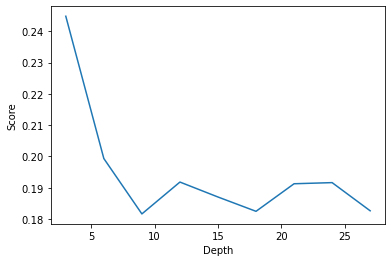

In [214]:
# Decision Tree:
depths = []
scores = []

for d in range(3, 30, 3):
    m = DecisionTreeRegressor(max_depth=d).fit(X_train, y_train)
    depths.append(d)
    scores.append(rmse_score(y_val, m.predict(X_val)))

dt_scores = pd.DataFrame({
    'Depth': depths,
    'Score': scores
})
sns.lineplot(data=dt_scores, x='Depth', y='Score');

In [215]:
tree_depth = int(dt_scores.loc[dt_scores['Score'] == dt_scores['Score'].min(), 'Depth'])
tree_depth

9

In [216]:
dt = DecisionTreeRegressor(max_depth=tree_depth)
dt.fit(X_train, y_train)

get_metrics(dt)

Cross validation score: [0.9931329  0.98226354 0.994576   0.98516313 0.99124759]
R2 score: 0.992497412829656
RMSE: 0.1776509891880923


<AxesSubplot:xlabel='N_estimators', ylabel='Score'>

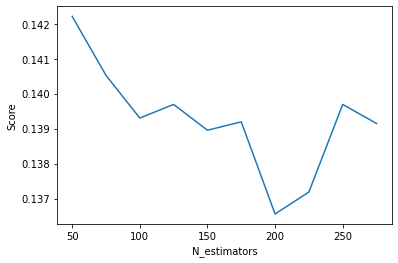

In [217]:
#Random Forest:
n_est = []
rf_rmse = []

for n in range(50, 300, 25):
    m = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    n_est.append(n)
    rf_rmse.append(rmse_score(y_val, m.predict(X_val)))

rf_scores = pd.DataFrame({
    'N_estimators': n_est,
    'Score': rf_rmse
})
sns.lineplot(data=rf_scores, x='N_estimators', y='Score')


In [218]:
n_estimators = int(rf_scores.loc[rf_scores['Score'] == rf_scores['Score'].min(), 'N_estimators'])
n_estimators

200

In [219]:
rf = RandomForestRegressor(n_estimators=n_estimators)
rf.fit(X_train, y_train)

get_metrics(rf)

Cross validation score: [0.99605625 0.99283863 0.99711099 0.99390664 0.99537621]
R2 score: 0.9954961628296191
RMSE: 0.13764278312750058


In [220]:
# XGBoost:
xgb = XGBRegressor(n_estimators=n_estimators)
xgb.fit(X_train, y_train)

get_metrics(xgb)

Cross validation score: [0.99542993 0.99091731 0.99675268 0.99339433 0.99484283]
R2 score: 0.9947192651159099
RMSE: 0.1490422119345709


In [221]:
# Gradient Boosting:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

get_metrics(gbr)


Cross validation score: [0.99611537 0.99285028 0.9974397  0.99425058 0.99560824]
R2 score: 0.9957598995838075
RMSE: 0.13355193228780746


In [222]:
# CatBoost
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train, verbose=0)

cbr_pred = cbr.predict(X_val)

cbr_r2 = r2_score(y_val, cbr_pred)
cbr_rmse = rmse_score(y_val, cbr_pred)
r2_list.append(cbr_r2)
rmse_list.append(cbr_rmse)

print('R2 score:', cbr_r2)
print('RMSE score:', cbr_rmse)

R2 score: 0.9953439494639804
RMSE score: 0.1399493699865655


In [223]:
model_list = ['linreg', 'ridge', 'lasso', 'svr', 'dt', 'rf', 'xgb', 'gbr', 'cbr']

summary = pd.DataFrame({
    'Model': model_list,
    'R2': r2_list,
    'RMSE': rmse_list
})
summary.sort_values('RMSE')

,Model,R2,RMSE
7,gbr,1.00,0.13
5,rf,1.00,0.14
8,cbr,1.00,0.14
6,xgb,0.99,0.15
0,linreg,0.99,0.17
1,ridge,0.99,0.17
4,dt,0.99,0.18
2,lasso,0.99,0.18
3,svr,0.89,0.67


### Save the model:

In [ ]:
import pickle
filename = 'Housing_price.pkl'
pickle.dump(cbr,open(filename,'wb'))

### Conclusion:

This Kernel investigates different models for housing price prediction. 

Different types of Machine Learning methods including CatBoostRegressor, GradientBoostingRegressor and LightGBM and two techniques in machine learning are compared and analysed for optimal solutions. Even though all of those methods achieved desirable results, different models have their own pros and cons.
The GradientBoostingRegressor is probably the best one and has been selected for this problem. 

The Bayesian Optimization method is simple but performs lot better than the three other available methods due to the generalization.
Finally, the CatBoostRegressor is the best choice when parameterization is the top priority.
